# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 20 (Thursday) 11:00 pm </b> </font>

## Prashant Madaan

# Introduction


The Objective of this assignment is to learn and apply Linear Regression. Linear Regression is an aproach to model the relationship between a scalar response or dependent variable and one or more independent variables.Linear regression is a type of supervised learning. A simple hypothesis for a Linear regression can be written as:

   y= x*w1 + w0
  1. y= predicted variable
  2. x=independent variable
  3. w0,w1= coefficients
  

### Error Function

The Error or Cost function represents how near the predicted value is to the actual value.The Error function has to be minimized to get a better model. The function we use linear regression has been mentioned below.


$$
E(\wv) = \sum_{i=1}^N \Big( f(\xv_i; \wv_i) - t_i \Big)^2
$$

This error/cost function indicates the value to be minimized is the sum of Euclidean distances between the target values and the predicted outputs.The terms int he fucntion are square so they do not lead to a bias.
   
I have applied the linear regression with Least Squares and Least Mean Squares, experimenting with different combination of features.The LS and LMS methods are explained later in the implementation section.|


# Data

## Introduction of Data for Regression
The ML problem aims to predict housing prices for the Melbourne area. The dataset contains 58189 rows and 13 columns. The list of columns and description is as below: 

<table style="width:100%">
  <tr>
    <th>Price</th>
    <th>Price in Australian dollars</th>
  </tr>
  
  <tr>
    <td>Method</td>
    <td> S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.</td> 
  </tr>
  <tr>
    <td>Type</td>
    <td>br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.</td> 
  </tr>
  <tr>
    <td>SellerG</td>
    <td>Real Estate Agent</td> 
  </tr>
  <tr>
    <td>Date</td>
    <td>Date sold</td> 
  </tr>
  <tr>
    <td>Distance</td>
    <td>Distance from CBD in Kilometres</td> 
  </tr>
  <tr>
    <td>Regionname</td>
    <td>General Region (West, North West, North, North east ...etc)</td> 
  </tr>
  <tr>
    <td>Propertycount</td>
    <td>Number of properties that exist in the suburb</td> 
  </tr>
  <tr>
    <td>Rooms</td>
    <td>Number of Bedrooms</td> 
  </tr>
  <tr>
    <td>CouncilArea</td>
    <td>Governing council for the area</td> 
  </tr>
  <tr>
    <td>Suburb</td>
    <td>Suburb</td> 
  </tr>
  <tr>
    <td>Address</td>
    <td>Address of the house</td> 
  </tr>
  <tr>
    <td>Postcode</td>
    <td>zip code of the house</td> 
  </tr>
</table>

Since now we have some intuition about our data set, we will move forward and start with reading the data.


### Source of Data
The data has been picked from a data set from Kaggle. The original source of data is publicly available results posted every week from Domain.com.au.
              
Kaggle Link -->https://www.kaggle.com/anthonypino/melbourne-housing-market/home


### Reading the Data
Initial Observations after downloading the data:
1. The data file has .csv extension. 
2. The rows in the file have column separated data. 
3. Headers are present in the file.
 
Read the data using read_csv function in the pandas library

In [123]:
import pandas as pd
import numpy as np
import matplotlib as matpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as scipyst
complete_dataset=pd.read_csv('MELBOURNE_HOUSE_PRICES.csv')

### Pre-Processing the data

As part of the pre-processing, the following steps were performed:
1. The data were divided into training and test sets.
2. The data was scanned for any null values.
3. The rows with the price as null values were removed.

In [124]:
 def partition_data(X, ratio=[0.8, 0.2]): 

    assert(np.sum(ratio) == 1)

    # shuffle the data indices 
    idxs = np.random.permutation(X.index)

    # the number of samples 
    N = X.shape[0]

    Xs = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows

        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])

        i += nrows

    return Xs

In [125]:
data_partitions=partition_data(complete_dataset)
train_dataset=data_partitions[0]
print("Shape of training set",train_dataset.shape)
test_dataset=data_partitions[1]
print("Shape of test set",test_dataset.shape)

Shape of training set (46551, 13)
Shape of test set (11638, 13)


<b>Partioning Data

In [126]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551 entries, 0 to 46550
Data columns (total 13 columns):
Suburb           46551 non-null object
Address          46551 non-null object
Rooms            46551 non-null int64
Type             46551 non-null object
Method           46551 non-null object
SellerG          46551 non-null object
Date             46551 non-null object
Postcode         46551 non-null int64
Regionname       46551 non-null object
Propertycount    46551 non-null int64
Distance         46551 non-null float64
CouncilArea      46551 non-null object
Price            36001 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 4.6+ MB


<b>List of all the columns and their data types.

In [127]:
train_dataset.describe()

,Rooms,Postcode,Propertycount,Distance,Price
count,46551.000000,46551.000000,46551.000000,46551.000000,3.600100e+04
mean,3.107237,3125.175829,7632.984533,12.686509,9.951914e+05
std,0.951167,124.951757,4444.615468,7.612363,5.900015e+05
min,1.000000,3000.000000,39.000000,0.000000,8.500000e+04
25%,3.000000,3055.000000,4380.000000,6.800000,6.195000e+05
50%,3.000000,3107.000000,6795.000000,11.400000,8.300000e+05
75%,4.000000,3163.000000,10412.000000,16.700000,1.215000e+06
max,12.000000,3978.000000,21650.000000,64.100000,8.000000e+06


<b>Some basic info about the data set indicating the mean, range and median of the various features

In [128]:
train_dataset.head(10)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price
0,Abbotsford,49 Lithgow St,3,h,S,Jellis,1/4/2017,3067,Northern Metropolitan,4019,3.0,Yarra,1490000.0
1,Abbotsford,59A Turner St,3,h,S,Marshall,1/4/2017,3067,Northern Metropolitan,4019,3.0,Yarra,1220000.0
2,Abbotsford,119B Yarra St,3,h,S,Nelson,1/4/2017,3067,Northern Metropolitan,4019,3.0,Yarra,1420000.0
3,Aberfeldie,68 Vida St,3,h,S,Barry,1/4/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley,1515000.0
4,Airport West,92 Clydesdale Rd,2,h,S,Nelson,1/4/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley,670000.0
5,Airport West,4/32 Earl St,2,t,S,Jellis,1/4/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley,530000.0
6,Airport West,3/74 Hawker St,2,u,S,Barry,1/4/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley,540000.0
7,Airport West,1/26 Highridge Cr,3,h,SP,Nelson,1/4/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley,715000.0
8,Albanvale,1 Jackson Cct,6,h,PI,hockingstuart,1/4/2017,3021,Western Metropolitan,1899,14.0,Brimbank,NaN
9,Albert Park,18 Mills St,3,h,S,Cayzer,1/4/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip,1925000.0


In [129]:
train_dataset.tail(10)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Price
46541,Richmond,10 Botherambo St,2,t,SP,Jellis,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1200000.0
46542,Richmond,288 Church St,3,h,S,Abercromby's,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1555000.0
46543,Richmond,25 Dickmann St,3,h,S,Marshall,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1361000.0
46544,Richmond,12 Longfield St,3,h,S,hockingstuart,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1540000.0
46545,Richmond,1/7 Sanders Pl,3,t,S,Jellis,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1582000.0
46546,Richmond,12 Tanner St,3,h,PI,Greg,25/02/2017,3121,Northern Metropolitan,14949,2.4,Yarra,1505000.0
46547,Ringwood,26 Andrew St,3,h,S,Fletchers,25/02/2017,3134,Eastern Metropolitan,7785,19.9,Maroondah,NaN
46548,Ringwood,1 Ashcombe Dr,3,h,S,hockingstuart,25/02/2017,3134,Eastern Metropolitan,7785,19.9,Maroondah,768000.0
46549,Ringwood,4 Caroline St,4,h,S,Barry,25/02/2017,3134,Eastern Metropolitan,7785,19.9,Maroondah,1300000.0
46550,Ringwood,1 Hillcrest Av,4,h,SN,Fletchers,25/02/2017,3134,Eastern Metropolitan,7785,19.9,Maroondah,NaN


<b>Sample data from the file

In [130]:
 train_dataset.isnull().sum().sort_values(ascending=False)

Price            10550
CouncilArea          0
Distance             0
Propertycount        0
Regionname           0
Postcode             0
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Address              0
Suburb               0
dtype: int64

<b>Checking the data for null values

In [131]:
# To remove all the Null column: Price

train_dataset_cleaned=train_dataset.dropna(subset=['Price']) 
train_dataset_cleaned.shape

(36001, 13)

<b>Removing the Null values

C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


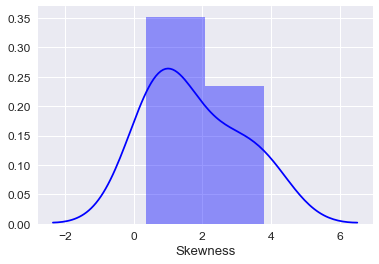

<Figure size 864x576 with 0 Axes>

In [132]:
train_dataset_skew=train_dataset_cleaned.skew()
sns.distplot(train_dataset_skew,color='blue',axlabel ='Skewness')
plt.figure(figsize = (12,8))
plt.show()

C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


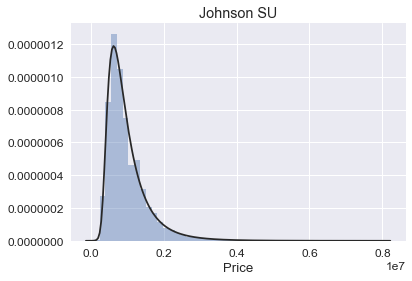

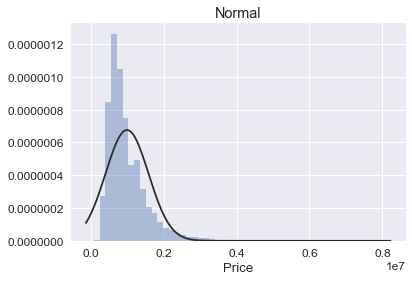

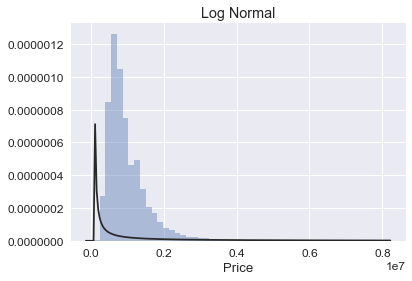

In [133]:
#Plotting transformations to identify which should be used
y = train_dataset_cleaned['Price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=scipyst.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=scipyst.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=scipyst.lognorm)

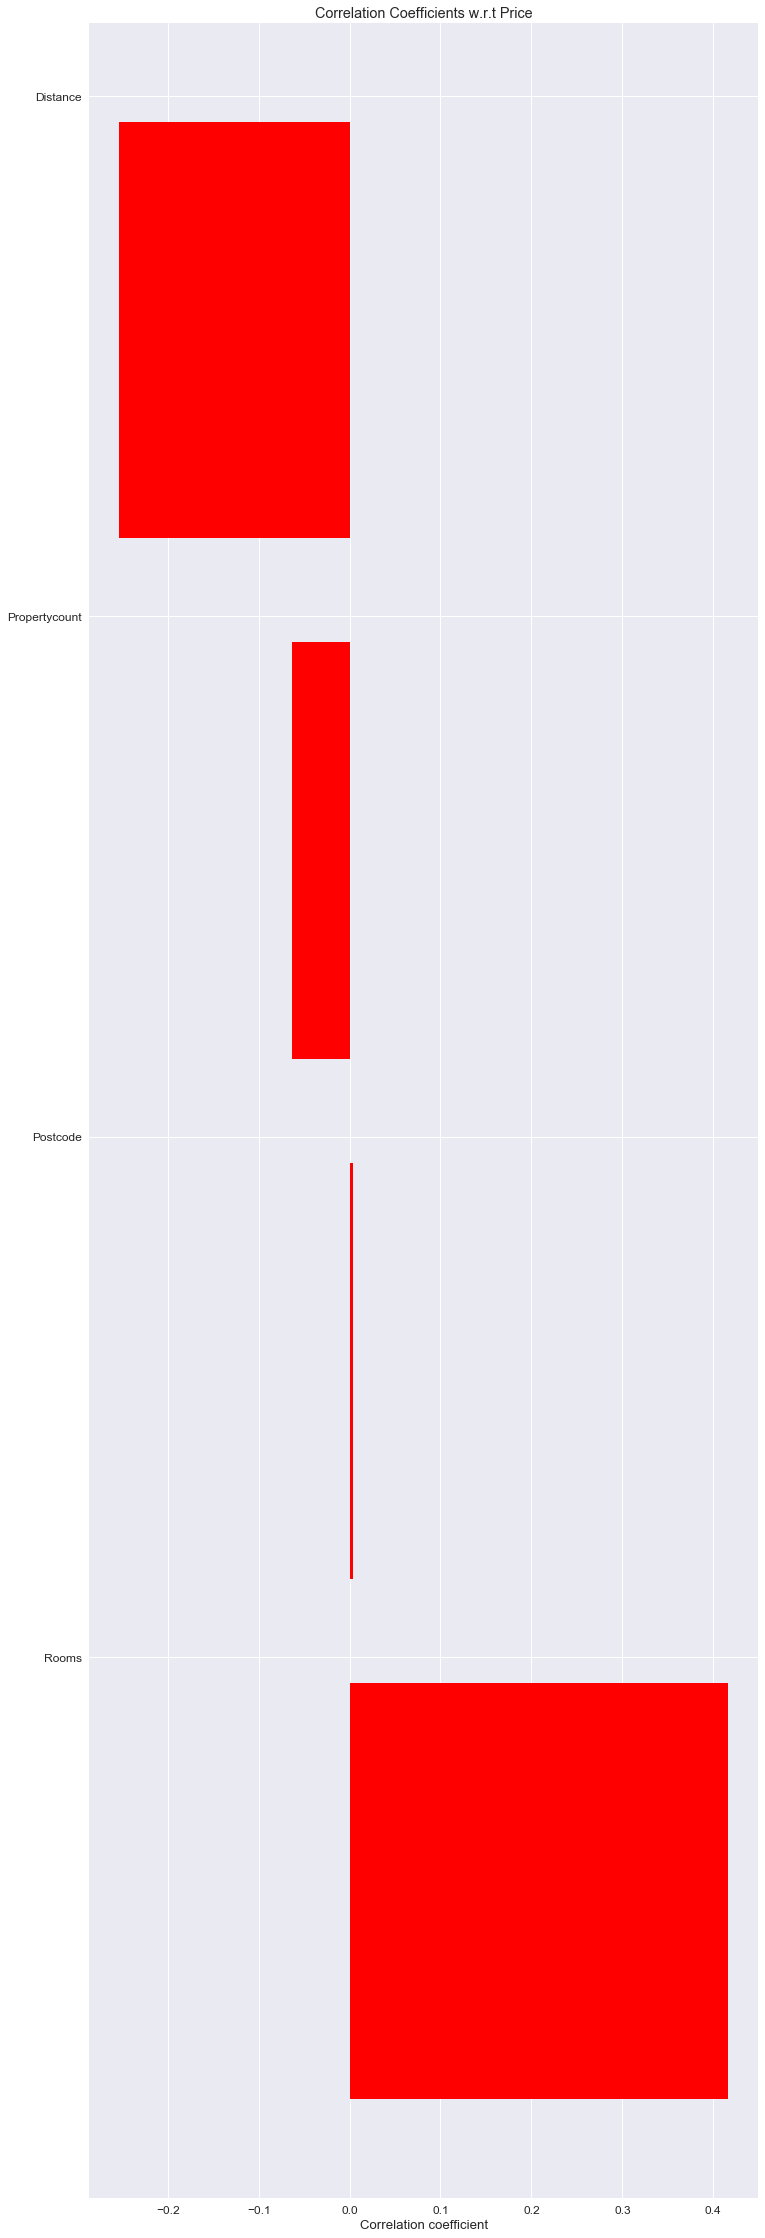

In [134]:
num_feat=train_dataset_cleaned.columns[train_dataset_cleaned.dtypes!=object]
num_feat=num_feat[0:-1]

labels = []
values = []


for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train_dataset_cleaned[col].values, train_dataset_cleaned.Price.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Price");

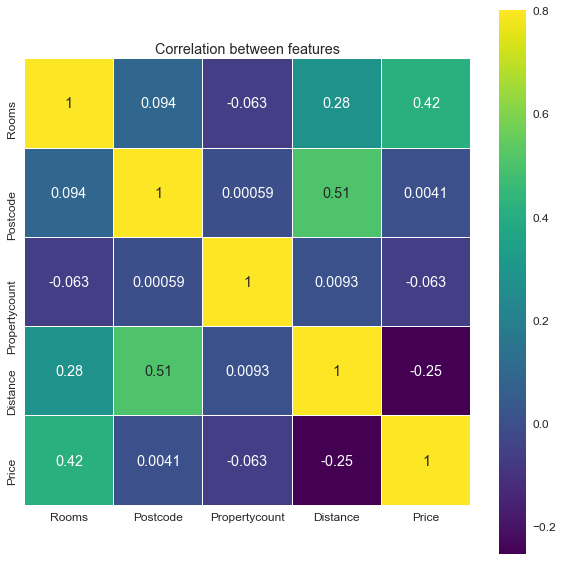

In [135]:
correlation_matrix=train_dataset_cleaned[['Rooms', 'Postcode', 'Propertycount', 'Distance', 'Price']].corr()
sns.set(font_scale=1.20)
plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


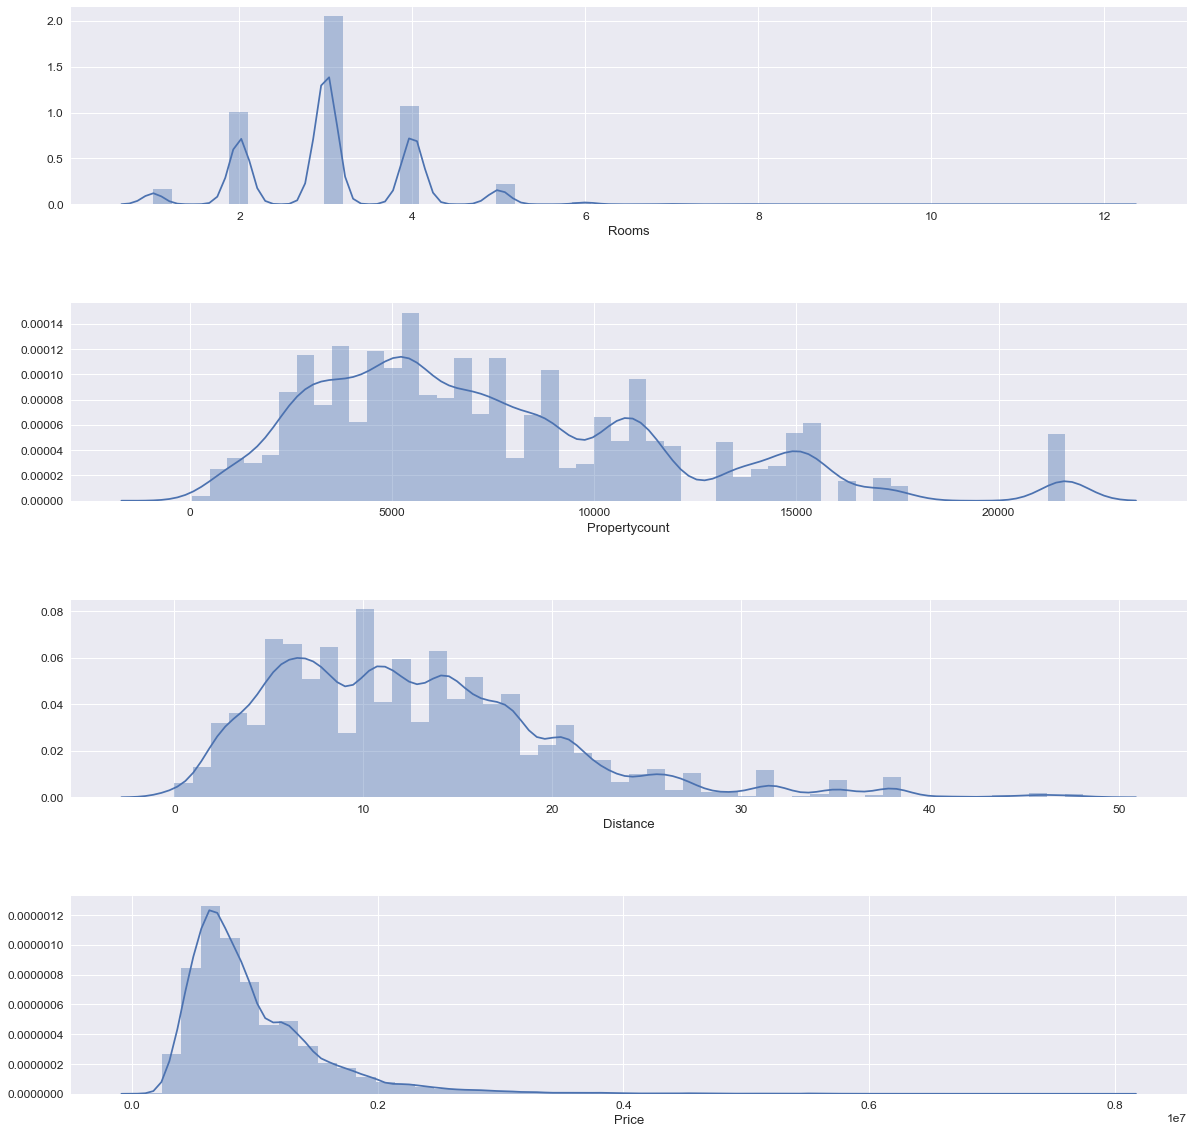

In [136]:
#Plotting Distribution Curves for the feature variables
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
distribution_plot_list=['Rooms', 'Propertycount', 'Distance', 'Price']
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 5):
    ax = fig.add_subplot(4,1, i)
    ax = sns.distplot(train_dataset_cleaned[distribution_plot_list[(i-1)]])

In [137]:
list_of_regions=train_dataset_cleaned['Regionname'].unique()
list_of_regions

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'South-Eastern Metropolitan',
       'Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria',
       'Western Victoria'], dtype=object)

C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

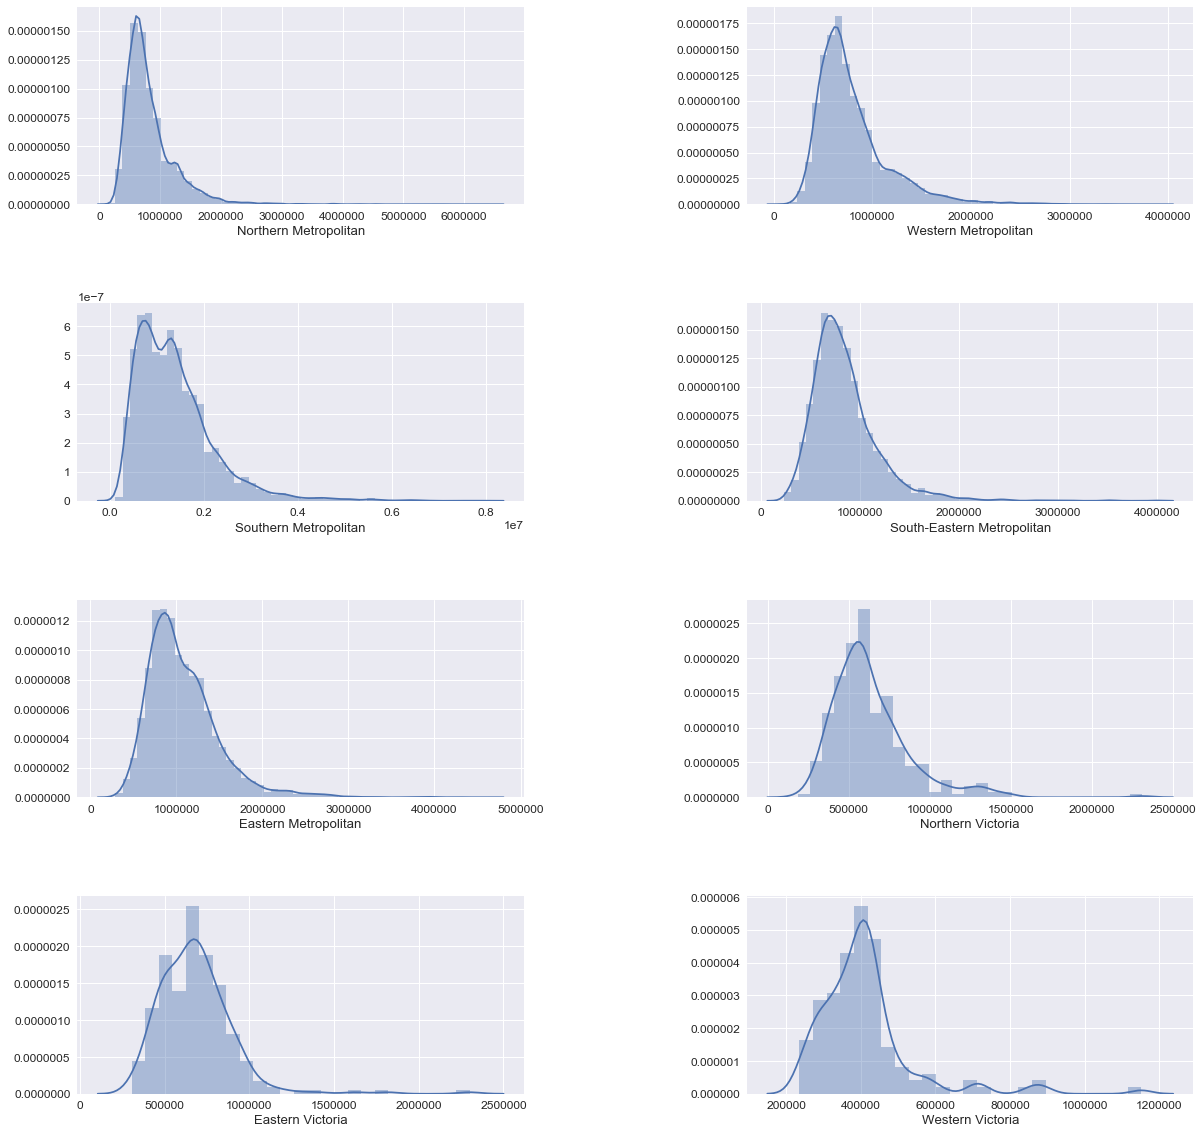

In [138]:
#Plotting Distribution Curves for the feature variables
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
distribution_plot_list=['Rooms', 'Propertycount', 'Distance', 'Price']
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 9):
    ax = fig.add_subplot(4,2, i)
    ax = sns.distplot(train_dataset_cleaned['Price'].loc[train_dataset_cleaned['Regionname'] == list_of_regions[i-1]].values,axlabel=list_of_regions[i-1])

<b>Distribution of House Prices Across Regions in Melbourne

### Preliminary Observation
1. On Average, the houses have 3 rooms in Melbourne and the average distance from the city center is 10 km.
2. The maximum houses in a suburb are 21650 and the minimum is 39 which is a substantial gap.
3. The minimum price of a house is 85000 Australian dollars and the maximum is 8000000. This might indicate some discrepancy in the data.
4. The output variable price contains 10550 blank values. These need to be removed.
5. The price data does not follow the normal fit. It will be a good idea to transform the data before applying linear regression. Although the logarithmic curve fits the data nicely, the Jhonson transformation looks like a better candidate.
6. The rooms attribute seems to have a high correlation with our output variable price.
7. There is a high correlation in the distance and postcode variable. It makes sense as the distance of house lying in an area code would be similar.
8. There are not many bivariate co-relations in the data. 
9. The room and distance variable distribution plots seem normally distributed.
10. The Price variable data seems to be skewed.
11. There are 8 regions in Melbourne.

# Method

We are using LS and LMS models in this exercise which are explained as below:

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description

## 1. Least Square Model
The LS model strives to minimize the sum of squared residuals. LS model is a "one go" fuction. It goes through the complete training data at once to find the best fit. This could be disadvantegous in case of a large data sets.The model is represented as below: 

$$
\begin{align}
\wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \Tm
\end{align}
$$

### Implementation 
I have done the following steps to implement this mode: 
1. We a Least Squares Class with two overiding methods, train and use respectively which have been over ridden from the base class.
    1. <b>Train Method</b> In the train method, we are passing the feature matrix X and the target variable matrix T. The method is responsible for training the LS model and calculating w i.e. coffiecients. 
        1. We add ones to the feature matrix i.e create x0 which is the corresponding column for w0.
        2. We calculate w with the above mentioned formula, with the code statement <b> self.W = np.linalg.inv(X1.T @ X1) @ X1.T @ T </b>
    2. <b>Use Method</b>  In the use method the feature matrix is passed.
        1. We calculate the predicted variable with the statement <b>y = self.add_ones(X) @ self.W </b> which simply means y = mx + c
        2. We return the predicted variables
    



## Least Mean Square Model
The LMS is a a sequential learning or an online learning method. This is particularly useful in case of large data sets. In this method we repeatedly re calculate w for every data point. We start with an initial guess of w and keep changing the w for every data point until it converges. The representation of this method as below: 

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \nabla E_k 
$$

Where alpha is the learning rate and Ek is the error of Kth sample. This is called sequential gradient descent. To implement this in we have the following equation: 

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \xv_k.
$$


### Implementation 
I have done the following steps to implement this mode: 
1. We have a LMS class with three predeclared methods train, use and train_step which have bee overriden from the base class.
    1. <b> Train Step Method: </b> In this method we are passing a single tupple of features and the corresponding output.
         1. We first append 1 in the begining of the feature tupple which acts as x0 for w0.
         2.  We have written a method "intialise_w" which checks if the self.w has already been assigned and if not assigns it with a array of 0s. This method is needed as an initialization of w is necessary for the online learning method.
         3. We calculate the predcted value "y" with existing weights using the this statement <b> y = self.w @ x1 </b> .
         4. After this we re calcualte the value of w with code  <b> self.w -= self.alpha * (y - t) * x1. </b>
    2. <b> Train Method: </b> In this method we passing the feature matrix X and the output result matrix T.
        1. In this we are iterating over each row of feature matrix and calling the train step function to perform the online training. 
    3. <b> Use Method </b> This method we passing the feature matrix X.
        1. We calculate the predicted values by y = self.add_ones(X) @ self.w.reshape(x_dim,1) and return these values.
             
             
The code as per this explaining is given below
      



### Super Classs Definition

In [139]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [140]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        N = X.shape[0]
        X1=self.add_ones(X)
        self.W = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
            
    # apply the learned model to data X
    def use(self, X):
      #  print(X.shape,X)
      #  print("value of w and sahpe",self.W.shape,self.W)
        y = self.add_ones(X) @ self.W
        return y

### Least Mean Squares

In [141]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        #pass  ## TODO: replace this with your codes
        X1=self.add_ones(X)
        self.w=np.zeros(X1.shape[1]);
      #  print("print w",self.w)
       # print("print shape of X1 when lms training is entered",X1.shape)
      #  print("printing value of X1",X1)
        for x, t in zip(X, T):
            self.train_step(x, t)
   
    def intialise_w(self,x):
        if not(isinstance(self.w,np.ndarray)) :
            self.w= np.zeros(len(x))
       #     print("Assigned w from none")
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
     #   pass  ## TODO: replace this with your codes
     #    print("old w",self.w)
     #    print("printing x",x)
         x1=np.append([1],x)
    #     print('This is X1',x1)
         self.intialise_w(x1)
         y = self.w @ x1
         self.w -= self.alpha * (y - t) * x1
    
    # apply the current model to data X
    def use(self, X):
        #pass  ## TODO: replace this with your codes
         x_dim=X.shape[1] + 1
         y = self.add_ones(X) @ self.w.reshape(x_dim,1)
       #  print("final value of w",self.w)  
         return y
        

### Usage Examples

In [142]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

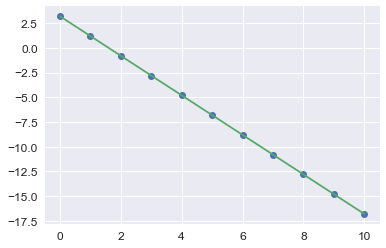

In [143]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.plot(ls.use(X))

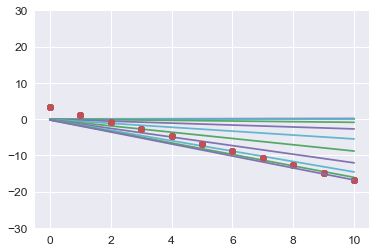

In [144]:
lms = LMS(0.01)
N = X.shape[0]
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(X,T,'o')
    plt.ylim([-30,30])
    plt.plot(lms.use(X))

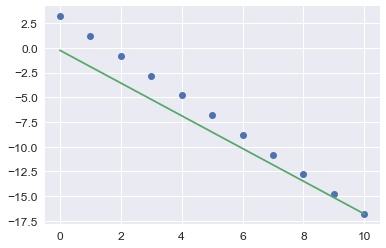

In [145]:
lms.train(X, T)
plt.plot(X,T,'o')
#plt.ylim([-30,30])
plt.plot(lms.use(X))

The Fit on this model can be increased by tweaking the learning rate and running this 100 times for this data so it converges

# Preliminary Test

In [148]:
### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    print(model.w)
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... None
passed.
---- Testing  LMS_All ... [ 0.2700536  3.1637888 -1.4307432]
passed.
---- Testing  LMS_1STEP ... [-0.02 -0.04 -0.1 ]
passed.


# Experiments and Visualizations

I have used my data to conduct experiments as following: 
1. LMS and LS model.
2. Selecting various sets and combinations of features.

After end of every experiment I have calculated 4 metrics to understand the fit of the model. The peformance measures are the following ones: 

1. Mean Absolute Error 
2. mean Squared Error 
3. RMSE
4. R Squared.

After every experiment i have calcuated these values which are indicated below each expriment respectively. Also, to prepare data for experiments we have done the following: 

1. Eliminating less impacting columns with the help of EDA which was performed earlier.
2. Normalization of Data
3. Conversion of categorical fields to binary columns using One Hot Encoding.

To convert the fields from categorical to binary, following steps were performed: 
1. The Categorcal data was converted to integers with help of label encoder.
2. The Integer encoded data was converted to binary columns with the help of one hot encoder.

Sckit learn libraries were used to perform this.

In [149]:
# Pre-Processing for Regression
from sklearn import metrics

# Kept only the rows in which an house was sold.
trial=train_dataset_cleaned[train_dataset_cleaned['Method']=='S']

#Encoding Regions
region_values=trial['Regionname'].values

from sklearn import preprocessing


label_encoder=preprocessing.LabelEncoder()

rgn_int_encode=label_encoder.fit_transform(region_values)


hot_encoder=preprocessing.OneHotEncoder(sparse=False)

rgn_int_encode = rgn_int_encode.reshape(len(rgn_int_encode), 1)

rgn_onehot_encoded=hot_encoder.fit_transform(rgn_int_encode)

#Encoding Type
type_values=trial['Type'].values

label_encoder=preprocessing.LabelEncoder()

type_int_encode=label_encoder.fit_transform(type_values)


hot_encoder=preprocessing.OneHotEncoder(sparse=False)

type_int_encode = type_int_encode.reshape(len(type_int_encode), 1)

type_onehot_encoded=hot_encoder.fit_transform(type_int_encode)


# Distance and Room
rooms_vector=trial['Rooms'].values
distance_vector=trial['Distance'].values

#stacking coolumns
#array_stacks=[rooms_vector,distance_vector,rgn_onehot_encoded,type_onehot_encoded]


Converted the Regions and type from categorical variables to binary features using 1 hot encoding.

# Normalization Fucntion
The fucntion normalizes the whole matrix column wise.

In [150]:

def normalize(X):
       for i in range(X.shape[1]) :
           x_column = X[:,i]
           mu = x_column.mean() 
           std = x_column.std()
           X[:,i] = (x_column - mu) / std
       return X

MAE: 1725728.6937405064
MSE: 5008484160712.595
RMSE: 2237964.289418532
R^2 = -11.12842127499706


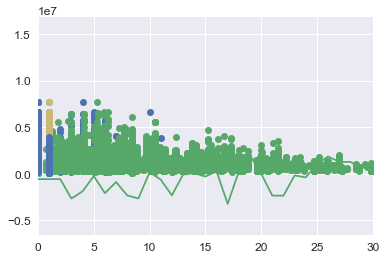

In [151]:
array_stacks=[rooms_vector,distance_vector,rgn_onehot_encoded,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(ls.use(X))

print('MAE:',metrics.mean_absolute_error(T,ls.use(X)))
print('MSE:',metrics.mean_squared_error(T,ls.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('R^2 =',metrics.explained_variance_score(T,ls.use(X)))


Least Square Using all the 4 features rooms, distance, regions and type

MAE: 4973098.956234266
MSE: 29870177313268.082
RMSE: 5465361.590349543
R^2 = -15.068471328509073


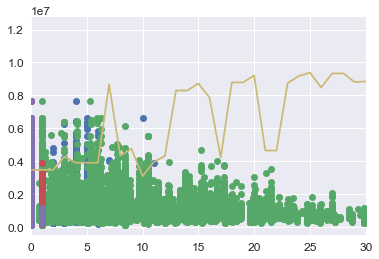

In [152]:
array_stacks=[rooms_vector,distance_vector,rgn_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(ls.use(X))

print('MAE:',metrics.mean_absolute_error(T,ls.use(X)))
print('MSE:',metrics.mean_squared_error(T,ls.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('R^2 =',metrics.explained_variance_score(T,ls.use(X)))


Least Square with the features rooms, distance, regions

MAE: 695322.3478771256
MSE: 856766006430.1442
RMSE: 925616.5547515581
R^2 = -1.6185131341471846


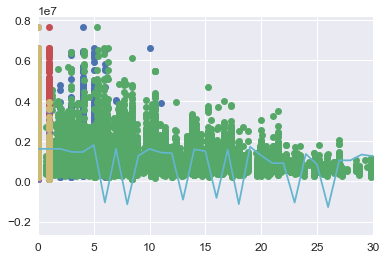

In [153]:
array_stacks=[rooms_vector,distance_vector,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(ls.use(X))

print('MAE:',metrics.mean_absolute_error(T,ls.use(X)))
print('MSE:',metrics.mean_squared_error(T,ls.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('R^2 =',metrics.explained_variance_score(T,ls.use(X)))


Least Square with the features rooms, distance, type

MAE: 6928875.908197708
MSE: 69056180120236.74
RMSE: 8310004.820710801
R^2 = -130.0745101007443


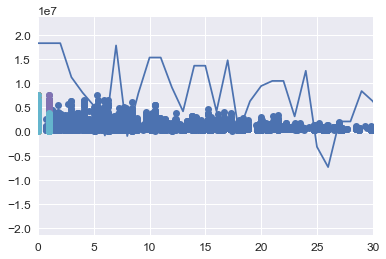

In [154]:
array_stacks=[distance_vector,rgn_onehot_encoded,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(ls.use(X))

print('MAE:',metrics.mean_absolute_error(T,ls.use(X)))
print('MSE:',metrics.mean_squared_error(T,ls.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('R^2 =',metrics.explained_variance_score(T,ls.use(X)))


Least Square with the features distance, regions, type

MAE: 327055.1620371637
MSE: 223663851337.14035
RMSE: 472931.12747750105
R^2 = 0.3011949927138149


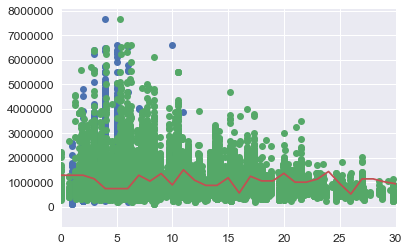

In [155]:
array_stacks=[rooms_vector,distance_vector]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(ls.use(X))

print('MAE:',metrics.mean_absolute_error(T,ls.use(X)))
print('MSE:',metrics.mean_squared_error(T,ls.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('R^2 =',metrics.explained_variance_score(T,ls.use(X)))


Least Square with the features rooms, distance

MAE: 1109728.534708554
MSE: 1975118210424.2524
RMSE: 1405388.9890077596
R^2 = -1.6781390252409327


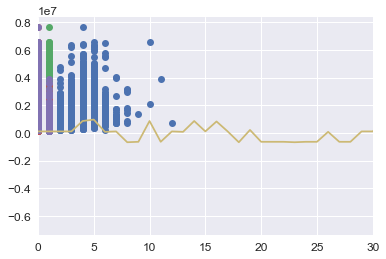

In [156]:
array_stacks=[rooms_vector,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(ls.use(X))

print('MAE:',metrics.mean_absolute_error(T,ls.use(X)))
print('MSE:',metrics.mean_squared_error(T,ls.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('R^2 =',metrics.explained_variance_score(T,ls.use(X)))


Least Square with the features rooms, type

MAE: 5771971.767520566
MSE: 35621693008145.74
RMSE: 5968391.157434786
R^2 = -6.216620164165641


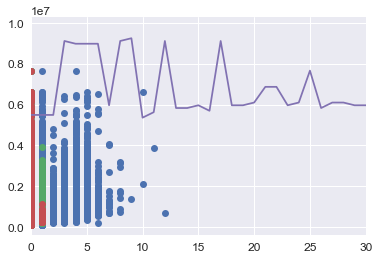

In [157]:
array_stacks=[rooms_vector,rgn_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(ls.use(X))

print('MAE:',metrics.mean_absolute_error(T,ls.use(X)))
print('MSE:',metrics.mean_squared_error(T,ls.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('R^2 =',metrics.explained_variance_score(T,ls.use(X)))


Least Square with the features rooms, regions

MAE: 1333573.8774628374
MSE: 2813105298606.9043
RMSE: 1677231.438593644
R^2 = -3.1728094711467802


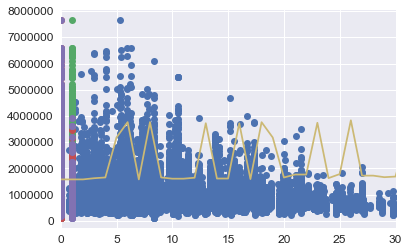

In [158]:
array_stacks=[distance_vector,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values

ls = LinearRegress()

ls.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(ls.use(X))

print('MAE:',metrics.mean_absolute_error(T,ls.use(X)))
print('MSE:',metrics.mean_squared_error(T,ls.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,ls.use(X))))
print('R^2 =',metrics.explained_variance_score(T,ls.use(X)))


Least Square with the features distance, type

MAE: 4.935915290452551e+23
MSE: 9.942659493499476e+48
RMSE: 3.153198295936917e+24
R^2 = -3.0950984885917764e+37


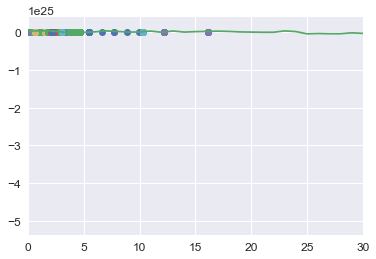

In [159]:
array_stacks=[rooms_vector,distance_vector,rgn_onehot_encoded,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

MAE: 4.0964613769360886e+23
MSE: 7.751553478687804e+48
RMSE: 2.784161180443367e+24
R^2 = -2.410927052727287e+37


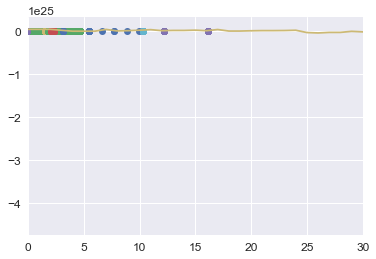

In [160]:
array_stacks=[rooms_vector,distance_vector,rgn_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

LMS Using all the 4 features rooms, distance, regions and type

MAE: 329812.48245105083
MSE: 218485327798.0539
RMSE: 467424.1412229945
R^2 = 0.32294593825646134


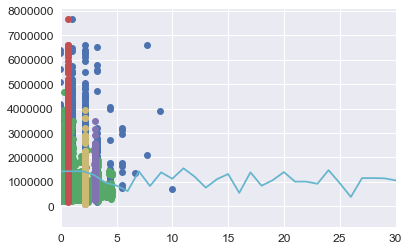

In [161]:
array_stacks=[rooms_vector,distance_vector,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

LMS using the features rooms, distance and type

MAE: 1.7063447203087192e+22
MSE: 3.812901539755504e+46
RMSE: 1.9526652400643342e+23
R^2 = -1.1875725607623306e+35


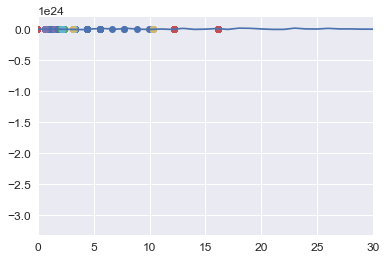

In [162]:
array_stacks=[rooms_vector,rgn_onehot_encoded,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

LMS using the features rooms, regions and type

MAE: 3.944976314784774e+23
MSE: 6.105840675492409e+48
RMSE: 2.4709999343367877e+24
R^2 = -1.9000981185504363e+37


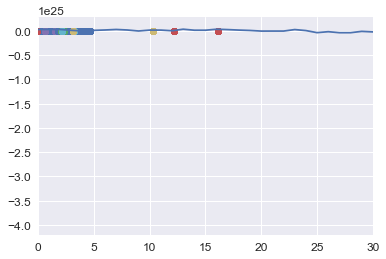

In [163]:
array_stacks=[distance_vector,rgn_onehot_encoded,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

LMS using the features regions, distance and type

MAE: 345376.2354416855
MSE: 228912490201.8057
RMSE: 478448.0015652753
R^2 = 0.2980562321483229


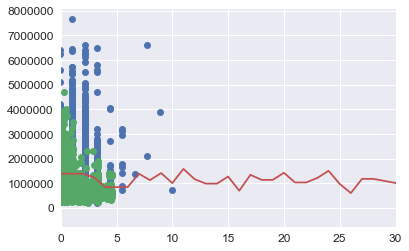

In [164]:
array_stacks=[rooms_vector,distance_vector]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

LMS using the features rooms, distance

MAE: 371475.41171245533
MSE: 278610580251.95776
RMSE: 527835.7512067156
R^2 = 0.1391921811035699


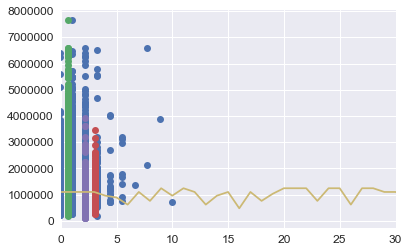

In [165]:
array_stacks=[rooms_vector,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

LMS using the features rooms and type

MAE: 1.2634621882522965e+22
MSE: 2.0886723661669267e+46
RMSE: 1.445223984774307e+23
R^2 = -6.504535267610252e+34


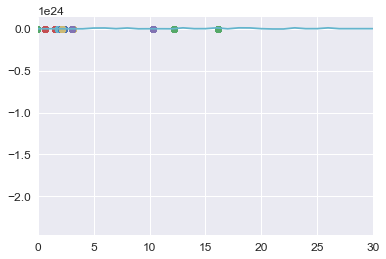

In [166]:
array_stacks=[rgn_onehot_encoded,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

LMS using the features regions and type

MAE: 3.282812237038903e+23
MSE: 4.8373345928201526e+48
RMSE: 2.1993941422173864e+24
R^2 = -1.504186188117868e+37


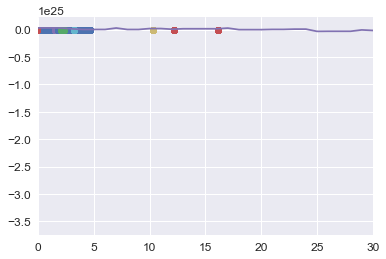

In [167]:
array_stacks=[distance_vector,rgn_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

LMS using the features regions, distance

MAE: 1.3725504033124575e+22
MSE: 4.3049455715787586e+46
RMSE: 2.0748362758489544e+23
R^2 = -1.339953418876552e+35


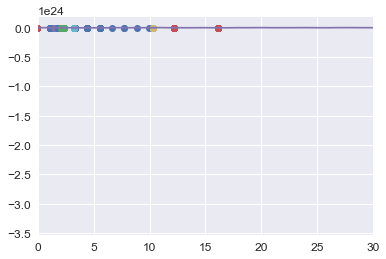

In [168]:
array_stacks=[rooms_vector,rgn_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

LMS using the features rooms, regions 

MAE: 350519.82547414786
MSE: 252680702100.7816
RMSE: 502673.5542086749
R^2 = 0.21256627614431245


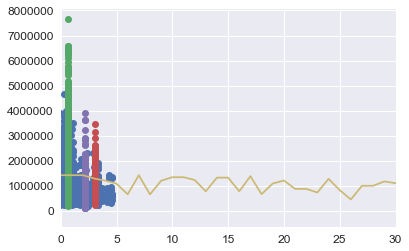

In [169]:
array_stacks=[distance_vector,type_onehot_encoded]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values
X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

MAE: 329812.4824510509
MSE: 218485327798.0539
RMSE: 467424.1412229945
R^2 = 0.32294593825646134


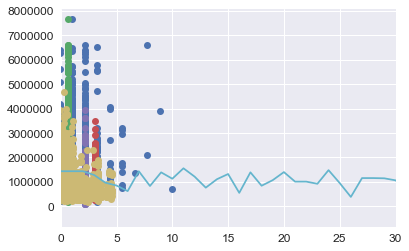

In [170]:

from sklearn import metrics

def normalize(X):
       for index in range(X.shape[1]) :
           x_column = X[:,index]
           mu = x_column.mean() 
           std = x_column.std()
           X[:,index] = (x_column - mu) / std
       return X

trial=train_dataset_cleaned[train_dataset_cleaned['Method']=='S']

array_stacks=[rooms_vector,type_onehot_encoded,distance_vector]
X=np.column_stack(array_stacks)
N = X.shape[0]
T=trial['Price'].values

X=normalize(X)

lms = LMS(0.01)

lms.train(X, T)
plt.plot(X,T,'o')
plt.xlim([0,30])
plt.plot(lms.use(X))

print('MAE:',metrics.mean_absolute_error(T,lms.use(X)))
print('MSE:',metrics.mean_squared_error(T,lms.use(X)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(T,lms.use(X))))
print('R^2 =',metrics.explained_variance_score(T,lms.use(X)))

## Analysis and Comparision of Algorithms

1. The best result has been found with applying LMS on features rooms, distance and type.
2. The best R2 which was achieved is R^2 = 0.32.
3. The LMS algorithm performed better after normalization of data.
4. The regions feature, when introducted decreases the accuracy. 
5. The output variable i.r. Price is most dependent rooms variable.
6. Normalization of data improves the fit.
7. Converting categorical variables regions and type increased the fit and accuracy.



# Extra Credit

## what is the most and least significant features for your data.

### Most Signifcant
The most significant features of dataset are the number of rooms, the distance from the city center, the type of house and the region.

### Least Significant
Address, SellerG and propertyCount are the least Significant features of the dataset.

# Conclusion 

1. Housing data was described and EDA and pre-processing was done.
2. LMS and LS was explained and coded in the given skelton.
3. Prelimenary test was run and all the cases passed. 
4. Housing Data was futher cleaned and prepared for the regression.
5. LMS and LS were applied on housing data with choosing various features in compbinations.
6. Results of the models were evaluated and compared.

# References
Following references have been used to do this assingment.
1. https://www.kaggle.com/ambarish/forest-cover-type-eda-and-modelling
2. https://www.kaggle.com/skillsmuggler/eda-and-dimension-reduction
3. https://www.kaggle.com/janiobachmann/melbourne-comprehensive-housing-market-analysis
4. https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
5. https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer?rq=1
6. https://www.kaggle.com/dansbecker/handling-missing-values
7. https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis
8. https://en.wikipedia.org/wiki/Linear_regression
9. https://en.wikipedia.org/wiki/Least_squares